# Quantization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('seaborn-v0_8-whitegrid')

| **Bit Depth** | **Number of Possible Values** | **Smallest Quantization Step** |
| -------------- | ------------------------------ | ----------------------------- |
| 8-bit          | 256                            | 1/127                         |
| 12-bit         | 4,096                          | 1/2047                        |
| 16-bit         | 65,536                         | 1/32767                       |
| 20-bit         | 1,048,576                      | 1/524287                      |
| 24-bit         | 16,777,216                     | 1/8388607                     |
| 32-bit         | 4,294,967,296                  | 1/2147483647                  |


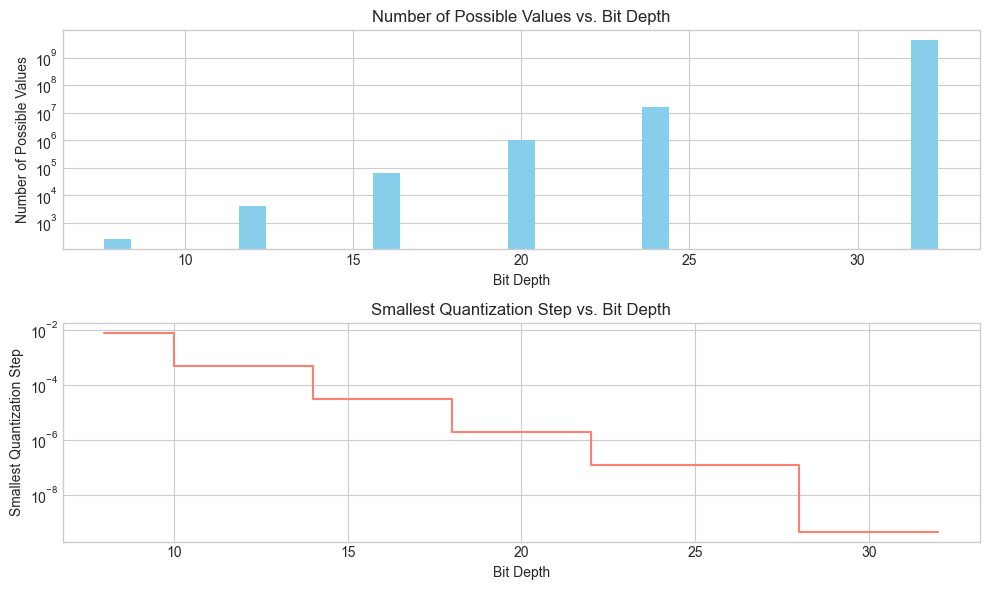

In [4]:
# Data
bit_depths = [8, 12, 16, 20, 24, 32]
num_possible_values = [256, 4096, 65536, 1048576, 16777216, 4294967296]
smallest_quantization_step = [1/127, 1/2047, 1/32767, 1/524287, 1/8388607, 1/2147483647]

# Plotting quantization levels
plt.figure(figsize=(10, 6))

# Bar plot for the number of possible values
plt.subplot(2, 1, 1)
plt.bar(bit_depths, num_possible_values, color='skyblue')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Bit Depth')
plt.ylabel('Number of Possible Values')
plt.title('Number of Possible Values vs. Bit Depth')

# Step plot for the smallest quantization step
plt.subplot(2, 1, 2)
plt.step(bit_depths, smallest_quantization_step, where='mid', color='salmon')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Bit Depth')
plt.ylabel('Smallest Quantization Step')
plt.title('Smallest Quantization Step vs. Bit Depth')

plt.tight_layout()
plt.show()

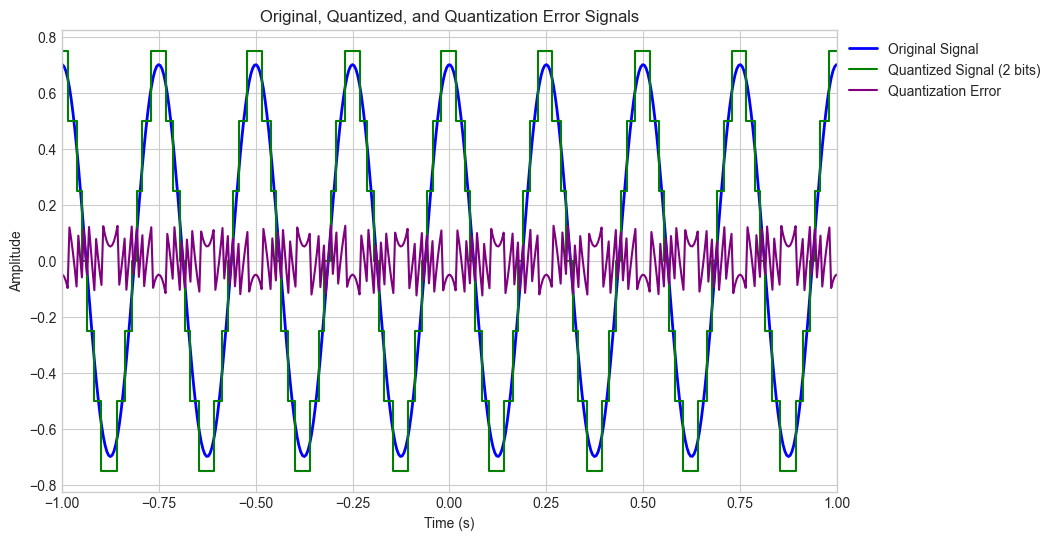

In [21]:
# Sampling parameters
fs = 48000    # Sampling rate
pt = 480     # Number of points in time domain
T = 1 / fs    # Sampling period

# Define a time vector for the discrete samples
t = np.linspace(-1.1, 1.1, pt)

# Define a signal with amplitude, frequency, phase
A = 0.7     # Amplitude
f0 = 4      # Frequency
phi = 0     # Phase

x_f0 = A * np.cos(2 * np.pi * f0 * t + phi)

# Quantization
n_bits = 2
quantization_step = 1 / 2 ** n_bits
quantized_signal = np.round(x_f0 / quantization_step) * quantization_step

# Quantization error
quantization_error = x_f0 - quantized_signal

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(t, x_f0, 'b', lw=2, label='Original Signal')
plt.step(t, quantized_signal, 'g-', label=f'Quantized Signal ({n_bits} bits)')
plt.plot(t, quantization_error, 'purple', label='Quantization Error')
plt.xlim(-1., 1.)  # Adjusted limits for better visualization
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original, Quantized, and Quantization Error Signals')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()